In [ ]:
#experiment 1
import numpy as np

# Define the step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Single artificial neuron function
def single_neuron(inputs, weights, bias):
    # Compute the weighted sum
    weighted_sum = np.dot(inputs, weights) + bias
    # Apply the activation function
    output = step_function(weighted_sum)
    return output

# Example data
# Inputs: Two features
inputs = np.array([0.5, -1.5])
# Weights for each input
weights = np.array([1.0, -1.0])
# Bias term
bias = 0.0

# Perform binary classification
output = single_neuron(inputs, weights, bias)

# Print the result
print(f"Inputs: {inputs}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")
print(f"Neuron Output (Class): {output}")


Inputs: [ 0.5 -1.5]
Weights: [ 1. -1.]
Bias: 0.0
Neuron Output (Class): 1


Training AND gate:
AND gate predictions: [0 0 0 1]


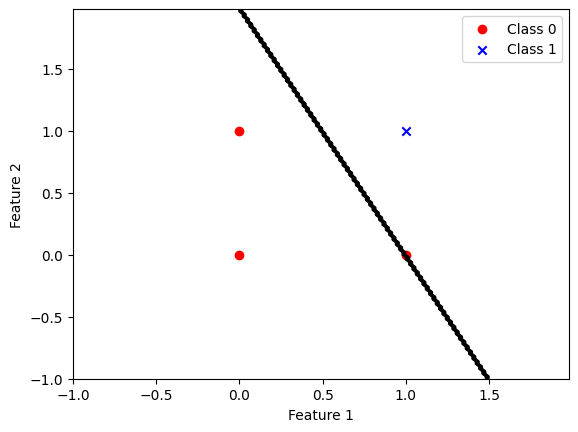


Training OR gate:
OR gate predictions: [0 1 1 1]


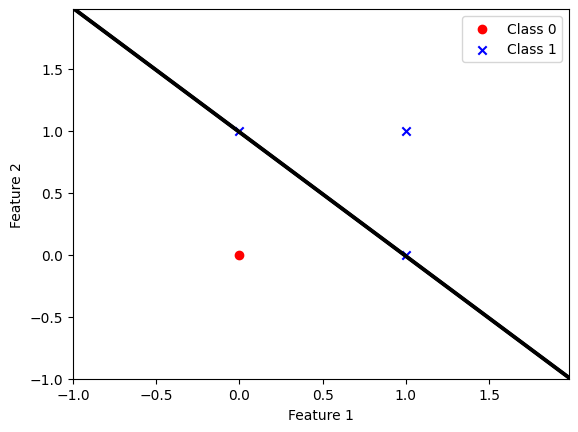


Training on custom dataset:
Accuracy: 1.0


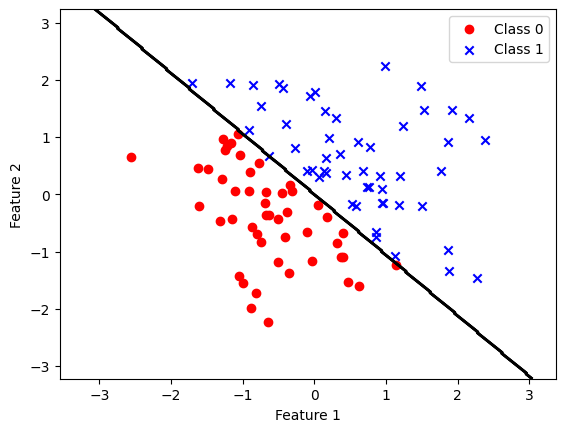

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        """Train the perceptron on input data.

        Parameters:
        X : array-like, shape = [n_samples, n_features]
        y : array-like, shape = [n_samples]
        """
        # Initialize weights and bias
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                # Calculate prediction
                prediction = self.predict_one(xi)

                # Update weights and bias if prediction is wrong
                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    errors += 1

            self.errors_.append(errors)
            # Stop if the perceptron has converged
            if errors == 0:
                break

    def predict_one(self, X):
        """Predict class for a single sample"""
        activation = np.dot(X, self.weights) + self.bias
        return 1 if activation >= 0 else 0

    def predict(self, X):
        """Predict class labels for multiple samples"""
        return np.array([self.predict_one(xi) for xi in X])

    def plot_decision_boundary(self, X, y):
        """Plot the decision boundary and data points"""
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')

        # Plot decision boundary
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                              np.arange(x2_min, x2_max, 0.02))

        Z = np.array([self.predict_one(np.array([x1, x2]))
                     for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
        Z = Z.reshape(xx1.shape)

        plt.contour(xx1, xx2, Z, colors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# Example usage for logical gates
def demonstrate_logical_gates():
    # Training data for AND gate
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])

    # Training data for OR gate
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])

    # Train AND gate
    print("Training AND gate:")
    p_and = Perceptron(learning_rate=0.1, n_iterations=100)
    p_and.fit(X_and, y_and)
    print("AND gate predictions:", p_and.predict(X_and))
    p_and.plot_decision_boundary(X_and, y_and)

    # Train OR gate
    print("\nTraining OR gate:")
    p_or = Perceptron(learning_rate=0.1, n_iterations=100)
    p_or.fit(X_or, y_or)
    print("OR gate predictions:", p_or.predict(X_or))
    p_or.plot_decision_boundary(X_or, y_or)

# Example usage for custom dataset
def demonstrate_custom_dataset():
    # Generate a simple linearly separable dataset
    np.random.seed(0)
    X = np.random.randn(100, 2)
    y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)

    # Train perceptron
    p = Perceptron(learning_rate=0.1, n_iterations=100)
    p.fit(X, y)

    # Plot results
    print("\nTraining on custom dataset:")
    print("Accuracy:", np.mean(p.predict(X) == y))
    p.plot_decision_boundary(X, y)

if __name__ == "__main__":
    demonstrate_logical_gates()
    demonstrate_custom_dataset()

Training AND gate:
AND gate predictions: [0 0 0 1]


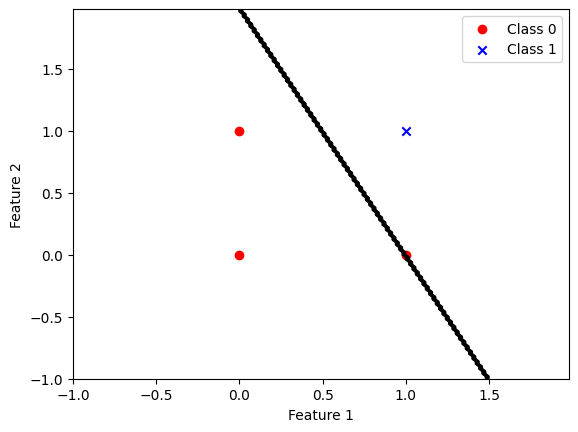


Training OR gate:
OR gate predictions: [0 1 1 1]


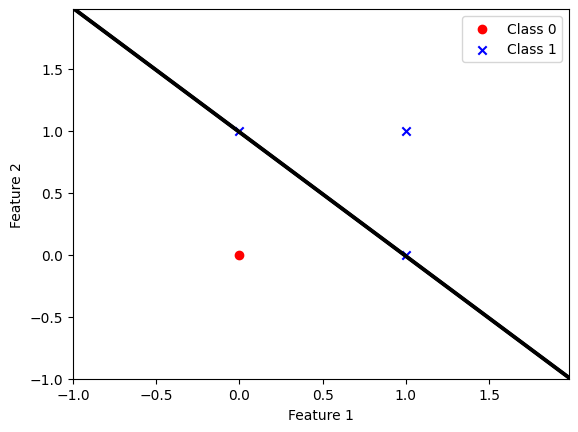


Training on custom dataset:
Accuracy: 1.0


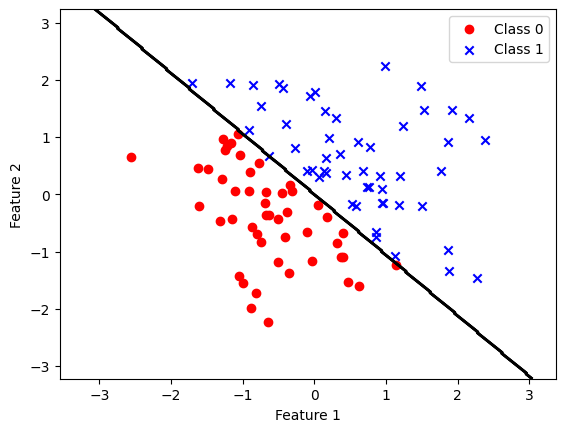

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0


        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):

                prediction = self.predict_one(xi)

                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    errors += 1

            self.errors_.append(errors)
            if errors == 0:
                break

    def predict_one(self, X):
        activation = np.dot(X, self.weights) + self.bias
        return 1 if activation >= 0 else 0

    def predict(self, X):
        return np.array([self.predict_one(xi) for xi in X])

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')

        # Plot decision boundary
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                              np.arange(x2_min, x2_max, 0.02))

        Z = np.array([self.predict_one(np.array([x1, x2]))
                     for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
        Z = Z.reshape(xx1.shape)

        plt.contour(xx1, xx2, Z, colors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

def demonstrate_logical_gates():
    # Training data for AND gate
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])

    # Training data for OR gate
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])

    # Train AND gate
    print("Training AND gate:")
    p_and = Perceptron(learning_rate=0.1, n_iterations=100)
    p_and.fit(X_and, y_and)
    print("AND gate predictions:", p_and.predict(X_and))
    p_and.plot_decision_boundary(X_and, y_and)

    # Train OR gate
    print("\nTraining OR gate:")
    p_or = Perceptron(learning_rate=0.1, n_iterations=100)
    p_or.fit(X_or, y_or)
    print("OR gate predictions:", p_or.predict(X_or))
    p_or.plot_decision_boundary(X_or, y_or)


def demonstrate_custom_dataset():

    np.random.seed(0)
    X = np.random.randn(100, 2)
    y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)

    p = Perceptron(learning_rate=0.1, n_iterations=100)
    p.fit(X, y)

    print("\nTraining on custom dataset:")
    print("Accuracy:", np.mean(p.predict(X) == y))
    p.plot_decision_boundary(X, y)

if __name__ == "__main__":
    demonstrate_logical_gates()
    demonstrate_custom_dataset()

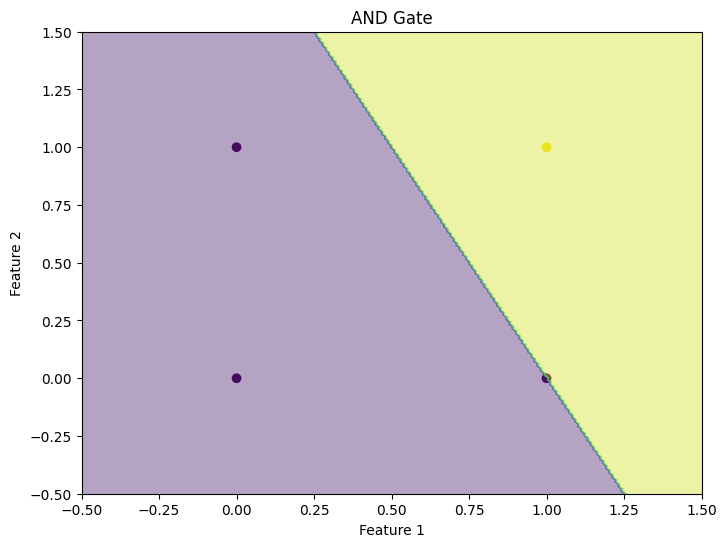

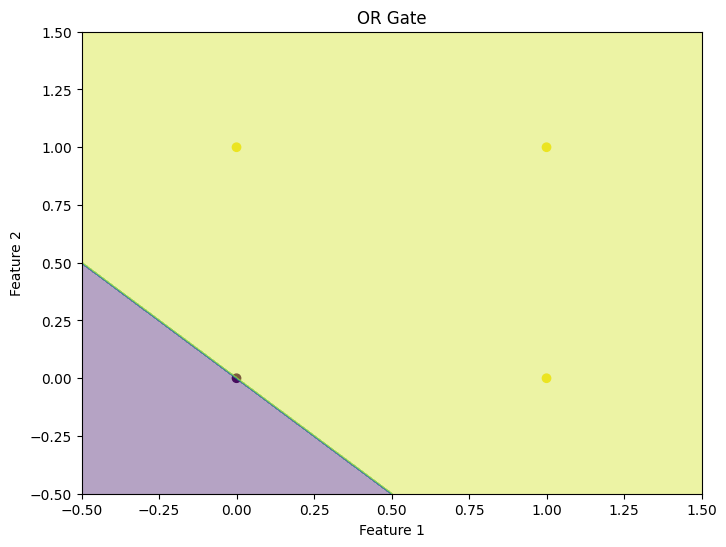

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def step_function(x):
    return np.where(x > 0, 1, 0)

class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.lr = lr
        self.epochs = epochs
        self.history = []

    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return step_function(z)

    def train(self, X, y):
        for epoch in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.lr * (target - prediction) * inputs
                self.weights[0] += self.lr * (target - prediction)
                self.history.append(self.weights.copy())


def plot_decision_boundary(X, y, perceptron, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))

    Z = np.array([perceptron.predict(np.array([x1, x2]))
                 for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

def main():
    # Logical Gates
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])

    for gate_name, X, y in [("AND Gate", X_and, y_and), ("OR Gate", X_or, y_or)]:
        perceptron = Perceptron(input_size=2, lr=0.1, epochs=10)
        perceptron.train(X, y)
        plot_decision_boundary(X, y, perceptron, gate_name)


if __name__ == "__main__":
    main()

Training Binary Classification (Breast Cancer Dataset)...


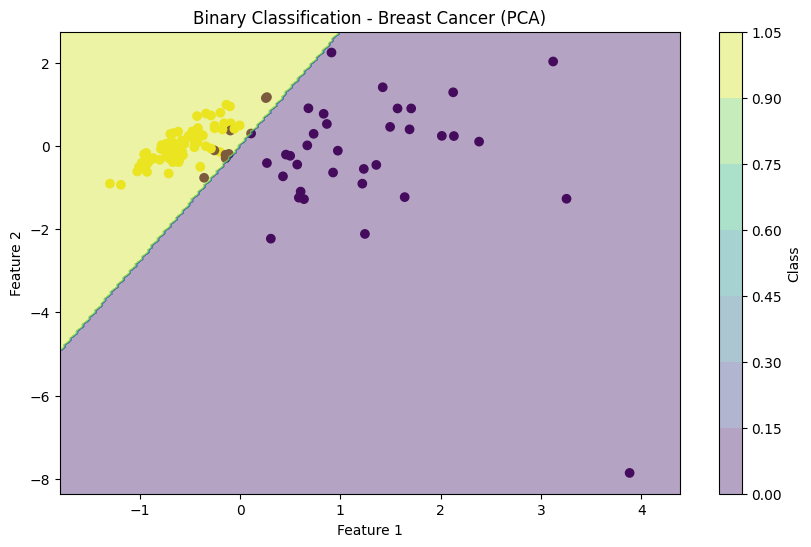


Training Multi-Class Classification (Wine Dataset)...


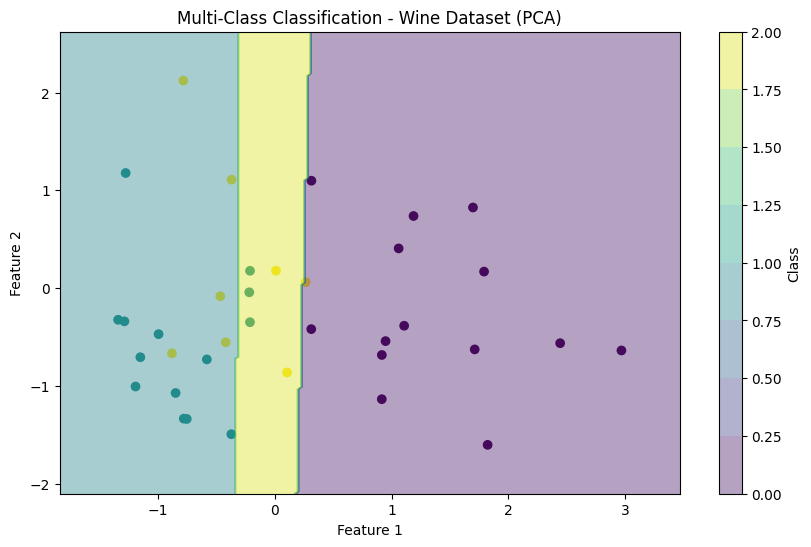

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def step_function(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.lr = lr
        self.epochs = epochs

    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return step_function(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.lr * (target - prediction) * inputs
                self.weights[0] += self.lr * (target - prediction)

class MultiClassPerceptron:
    def __init__(self, input_size, num_classes, lr=0.01, epochs=100):
        self.weights = np.zeros((num_classes, input_size + 1))
        self.lr = lr
        self.epochs = epochs

    def predict_one(self, x):
        z = np.dot(self.weights[:, 1:], x) + self.weights[:, 0]
        probs = softmax(z)
        return np.argmax(probs)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                z = np.dot(self.weights[:, 1:], inputs) + self.weights[:, 0]
                probs = softmax(z).flatten()
                target_dist = np.zeros_like(probs)
                target_dist[target] = 1
                error = target_dist - probs
                self.weights[:, 1:] += self.lr * np.outer(error, inputs)
                self.weights[:, 0] += self.lr * error

def plot_decision_boundary(X, y, perceptron, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = perceptron.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(label='Class')
    plt.show()

def main():
    print("Training Binary Classification (Breast Cancer Dataset)...")
    data = load_breast_cancer()
    X, y = data.data, data.target
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    scaler = StandardScaler()
    X_pca = scaler.fit_transform(X_pca)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    binary_perceptron = Perceptron(input_size=X_train.shape[1], lr=0.01, epochs=100)
    binary_perceptron.train(X_train, y_train)
    plot_decision_boundary(X_test, y_test, binary_perceptron, "Binary Classification - Breast Cancer (PCA)")

    print("\nTraining Multi-Class Classification (Wine Dataset)...")
    wine = load_wine()
    X, y = wine.data, wine.target
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    X_pca = scaler.fit_transform(X_pca)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    multi_perceptron = MultiClassPerceptron(input_size=X_train.shape[1], num_classes=3, lr=0.01, epochs=100)
    multi_perceptron.train(X_train, y_train)
    plot_decision_boundary(X_test, y_test, multi_perceptron, "Multi-Class Classification - Wine Dataset (PCA)")

if __name__ == "__main__":
    main()

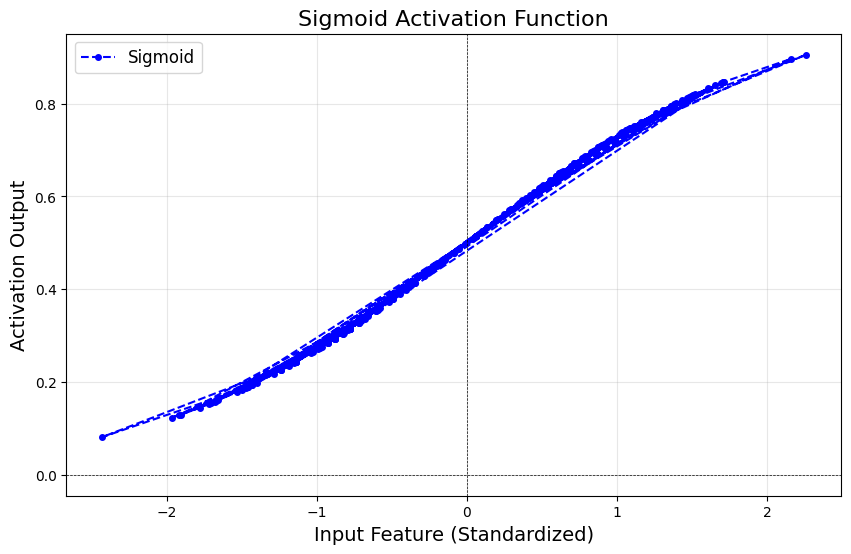

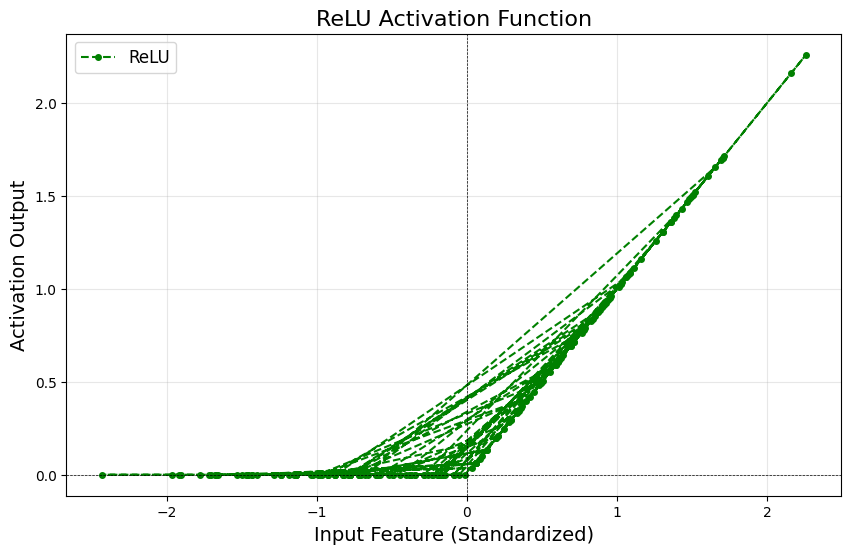

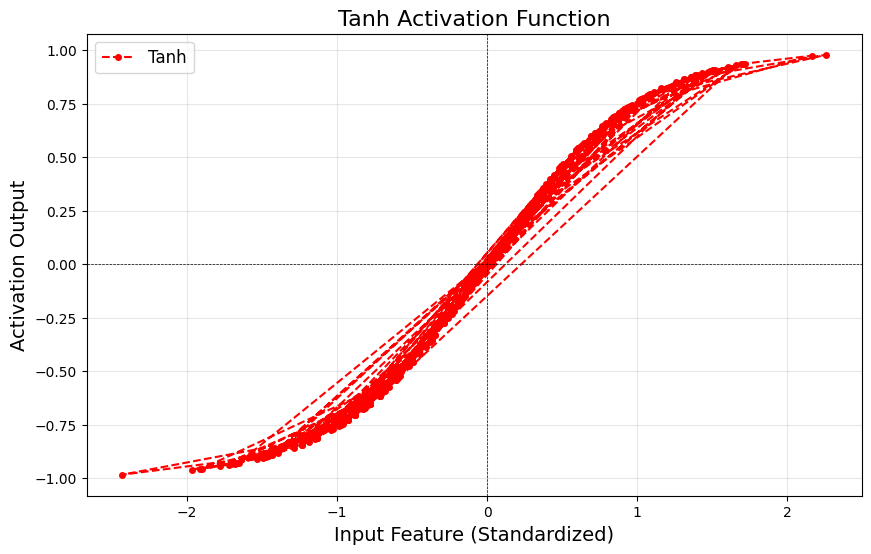

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Tanh function
def tanh(x):
    return np.tanh(x)

# Apply activation functions to the first feature of the dataset
feature = X_scaled[:, 0]  # Choose the first feature for comparison

sigmoid_output = sigmoid(feature)
relu_output = relu(feature)
tanh_output = tanh(feature)

# Plot Sigmoid
plt.figure(figsize=(10, 6))
plt.plot(feature, sigmoid_output, label='Sigmoid', color='blue', marker='o', linestyle='--', markersize=4)
plt.title('Sigmoid Activation Function', fontsize=16)
plt.xlabel('Input Feature (Standardized)', fontsize=14)
plt.ylabel('Activation Output', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plot ReLU
plt.figure(figsize=(10, 6))
plt.plot(feature, relu_output, label='ReLU', color='green', marker='o', linestyle='--', markersize=4)
plt.title('ReLU Activation Function', fontsize=16)
plt.xlabel('Input Feature (Standardized)', fontsize=14)
plt.ylabel('Activation Output', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plot Tanh
plt.figure(figsize=(10, 6))
plt.plot(feature, tanh_output, label='Tanh', color='red', marker='o', linestyle='--', markersize=4)
plt.title('Tanh Activation Function', fontsize=16)
plt.xlabel('Input Feature (Standardized)', fontsize=14)
plt.ylabel('Activation Output', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import numpy as np

# Sigmoid function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Mean Squared Error loss
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Data (X: input, y: target)
X = np.array([[0.1, 0.2], [0.2, 0.1], [0.3, 0.3], [0.4, 0.5]])  # 4 samples, 2 features
y = np.array([[0], [1], [0], [1]])  # Binary targets

# Neural network parameters
np.random.seed(42)
n_input = X.shape[1]   # Number of input features
n_hidden = 3           # Number of hidden neurons
n_output = 1           # Output size

# Initialize weights and biases
W1 = np.random.randn(n_input, n_hidden) * 0.01
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.01
b2 = np.zeros((1, n_output))

# Learning rate
learning_rate = 0.01

# Forward and Backpropagation
for epoch in range(1000):  # Number of iterations
    # Forward Propagation
    Z1 = np.dot(X, W1) + b1          # Linear for hidden layer
    A1 = sigmoid(Z1)                # Activation for hidden layer
    Z2 = np.dot(A1, W2) + b2        # Linear for output layer
    A2 = sigmoid(Z2)                # Activation for output layer

    # Compute loss
    loss = compute_loss(y, A2)

    # Backpropagation
    dZ2 = A2 - y                    # Loss gradient w.r.t. output
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)         # Gradient w.r.t. hidden activations
    dZ1 = dA1 * sigmoid_derivative(Z1)  # Gradient w.r.t. hidden pre-activations
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final results
print("Final weights and biases:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)

Epoch 0, Loss: 0.2500
Epoch 100, Loss: 0.2500
Epoch 200, Loss: 0.2500
Epoch 300, Loss: 0.2500
Epoch 400, Loss: 0.2500
Epoch 500, Loss: 0.2500
Epoch 600, Loss: 0.2500
Epoch 700, Loss: 0.2500
Epoch 800, Loss: 0.2500
Epoch 900, Loss: 0.2500
Final weights and biases:
W1: [[ 0.0058412  -0.00104256  0.00606273]
 [ 0.01566427 -0.00217279 -0.0025472 ]]
b1: [[-2.02063633e-05 -8.64614132e-06  8.28188874e-06]]
W2: [[ 0.01384421]
 [ 0.00476906]
 [-0.00714091]]
b2: [[-0.00552233]]
